In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
# Load the yearly dataset
yearly_file_path = r"C:\Users\91970\Downloads\SN_y_tot_V2.0.csv"  # Update this with the correct path


In [3]:
# Read the dataset
yearly_data = pd.read_csv(yearly_file_path, delimiter=';', header=None)


In [4]:
# Inspect the first few rows and the shape of the DataFrame
print("First few rows of the dataset:")
print(yearly_data.head())
print("Shape of the dataset:", yearly_data.shape)

First few rows of the dataset:
        0     1    2  3  4
0  1700.5   8.3 -1.0 -1  1
1  1701.5  18.3 -1.0 -1  1
2  1702.5  26.7 -1.0 -1  1
3  1703.5  38.3 -1.0 -1  1
4  1704.5  60.0 -1.0 -1  1
Shape of the dataset: (322, 5)


In [5]:
# Check how many columns are in the DataFrame
num_columns = yearly_data.shape[1]
print(f"Number of columns in the dataset: {num_columns}")


Number of columns in the dataset: 5


In [6]:
# Preprocess the yearly data
if num_columns >= 2:  # Check if there are at least 2 columns
    # Adjust this line based on the actual number of columns
    yearly_data.columns = ['Year', 'Mean Sunspot Number'] + [f'Extra_{i}' for i in range(num_columns - 2)]
else:
    raise ValueError("The dataset does not contain enough columns.")


In [7]:
# Check for valid years
yearly_data['Year'] = pd.to_numeric(yearly_data['Year'], errors='coerce')  # Convert to numeric, coercing errors
yearly_data = yearly_data[yearly_data['Year'].notna()]  # Remove rows with NaN in 'Year'
yearly_data = yearly_data[(yearly_data['Year'] >= 1900) & (yearly_data['Year'] <= 2100)]  # Keep reasonable year range


In [8]:
# Check if there are still valid entries after filtering
if yearly_data.empty:
    raise ValueError("No valid year entries found after filtering.")


In [9]:
# Convert 'Year' to datetime
yearly_data['Year'] = pd.to_datetime(yearly_data['Year'], format='%Y')


In [10]:
# Continue with preprocessing
yearly_data = yearly_data[yearly_data['Mean Sunspot Number'] >= 0]  # Remove invalid entries
yearly_data = yearly_data.rename(columns={'Year': 'ds', 'Mean Sunspot Number': 'y'})
yearly_data['y'] = yearly_data['y'].replace(0, 1e-6)  # Avoid log(0)
yearly_data['y'] = yearly_data['y'].apply(lambda x: np.log(x + 1e-6))  # Log transformation
yearly_data = yearly_data[yearly_data['y'] > 0]  # Keep only positive values


In [11]:
# Initialize and fit the Prophet model for yearly data
yearly_model = Prophet()
yearly_model.fit(yearly_data[['ds', 'y']])  # Fit only with the required columns


14:37:49 - cmdstanpy - INFO - Chain [1] start processing
14:37:49 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Generate future dates and forecast for the next 20 years
future_yearly = yearly_model.make_future_dataframe(periods=20, freq='Y')
forecast_yearly = yearly_model.predict(future_yearly)

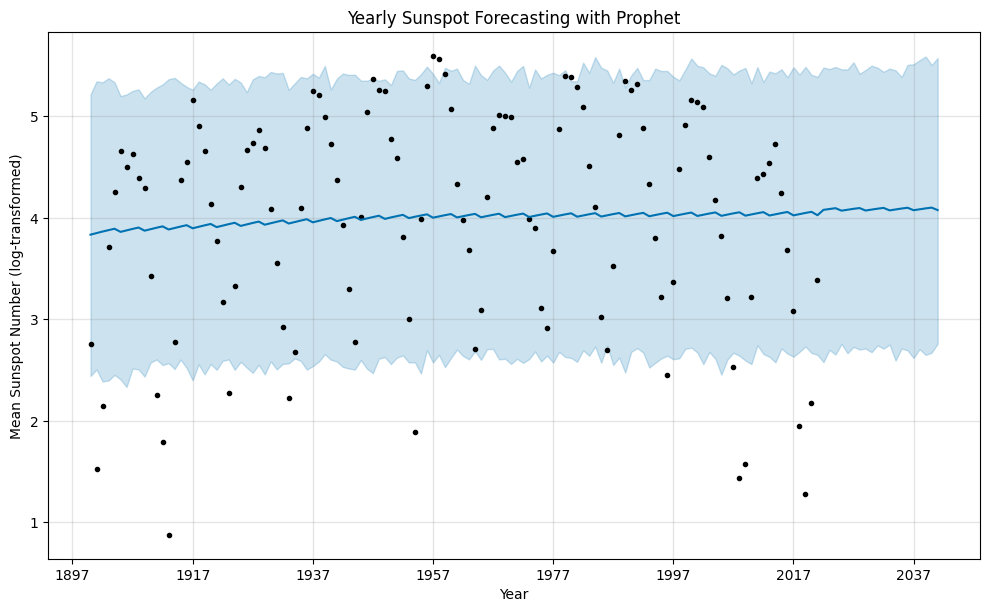

In [13]:
# Plot the forecast for yearly data
fig_yearly = yearly_model.plot(forecast_yearly)
plt.title("Yearly Sunspot Forecasting with Prophet")
plt.xlabel("Year")
plt.ylabel("Mean Sunspot Number (log-transformed)")
plt.show()

In [14]:
# Calculate metrics for the last available predictions if applicable
if len(yearly_data) >= 20:
    y_true_yearly = yearly_data['y'].tail(20)  # Adjust based on available data
    y_pred_yearly = forecast_yearly['yhat'][-20:]  # Corresponding predictions

    mae_yearly = mean_absolute_error(y_true_yearly, y_pred_yearly)
    mape_yearly = mean_absolute_percentage_error(y_true_yearly, y_pred_yearly)
    r2_yearly = r2_score(y_true_yearly, y_pred_yearly)

    # Corrected print statement
    print(f"Yearly Forecast Metrics: MAE: {mae_yearly:.4f}, MAPE: {mape_yearly:.4f}, R²: {r2_yearly:.4f}")
else:
    print("Not enough data to calculate metrics.")

Yearly Forecast Metrics: MAE: 1.0605, MAPE: 0.5122, R²: -0.3696
